# Battery Operating State (Status) Analysis 

This dataset has a "Line" column, which represents a number that increases by 1 every time the battery operating state changes. This notebook uses this feature to visualize the battery state by plotting graphs showing the status, current, voltage, and state changes. Users can also choose to plot only a part of the graph by specifying a start time and an end time. The battery status can be classified as Rest, CC Charge, CV Charge, CC Discharge, CV Discharge, and Current Pulses.

In [3]:
# Importing the required functions
from states_functions import *

# File path to the dataset
file_path = "data_pub/CU_Dynamic/CU005/BW-VTC-447_7686_CU_cyc_005_BW-VTC-AgeVal.mat"

# Load and process data
data = process_states(file_path)


In [4]:
metrics = analyze_metrics_by_status_period(data)
metrics

,status,start_time,end_time,duration,avg_current,std_current,avg_tension,std_tension,avg_temperature,std_temperature
0,Rest,5.552000e-07,2.997255,2.997255,0.000000,0.000000,3.739603,1.280321e-03,20.814322,0.610464
1,CC Discharge,3.000100e+00,3.431348,0.431248,-2.499969,0.000276,3.357908,2.479494e-01,22.970143,1.068590
2,Rest,3.431385e+00,5.428607,1.997222,0.000000,0.000000,3.049857,5.677038e-02,21.765300,0.978227
3,CC Charge,5.431451e+00,6.258216,0.826765,2.499986,0.000221,3.813971,2.232259e-01,24.160262,1.056838
4,CV Charge,6.260997e+00,6.591054,0.330057,0.526364,0.614135,4.199749,3.627361e-04,24.060175,0.666367
5,CC Discharge,6.593928e+00,7.498301,0.904373,-2.499980,0.000301,3.625993,3.193085e-01,23.927396,0.643713
6,CV Discharge,7.501083e+00,7.704792,0.203709,-0.171622,0.221593,2.499858,6.078667e-05,25.386574,0.558398
7,CC Charge,7.704829e+00,8.569163,0.864333,2.436489,0.393981,3.764244,3.160686e-01,25.082564,0.313692
8,CV Charge,8.571945e+00,8.898844,0.326900,0.526403,0.614579,4.199744,3.660245e-04,24.192765,0.696999
9,CC Discharge,8.901722e+00,9.806789,0.905067,-2.499990,0.000182,3.627221,3.174201e-01,23.834266,0.508894


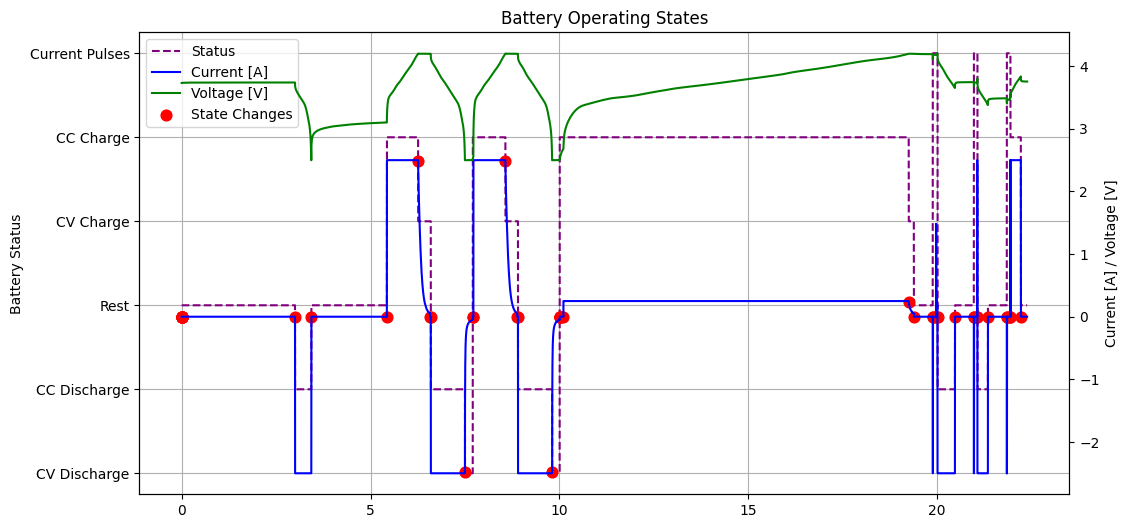

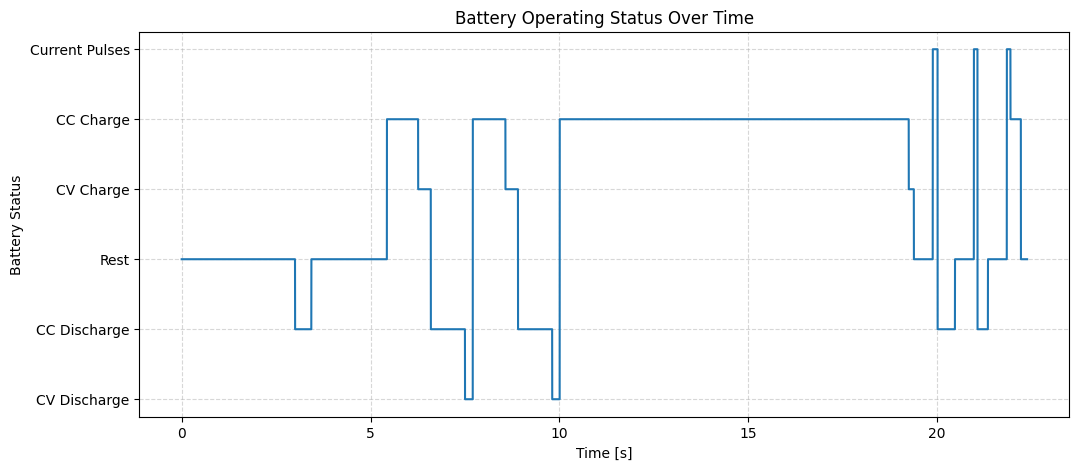

In [5]:
# State analysis and plotting
plot_battery_data(data)
plot_battery_status(data)

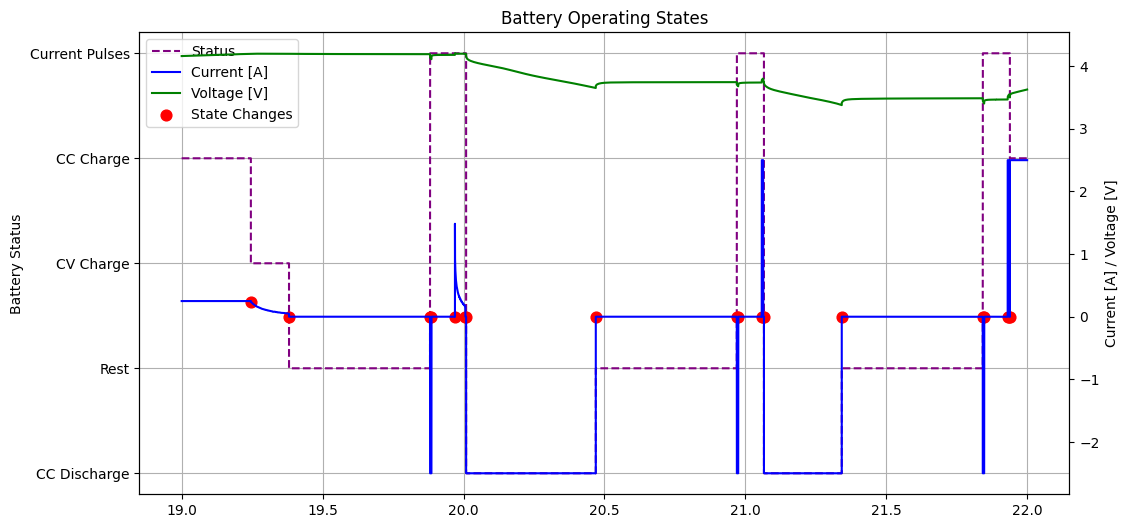

In [6]:
# Current pulses analysis and plotting
plot_battery_data(data, start=19, end=22)

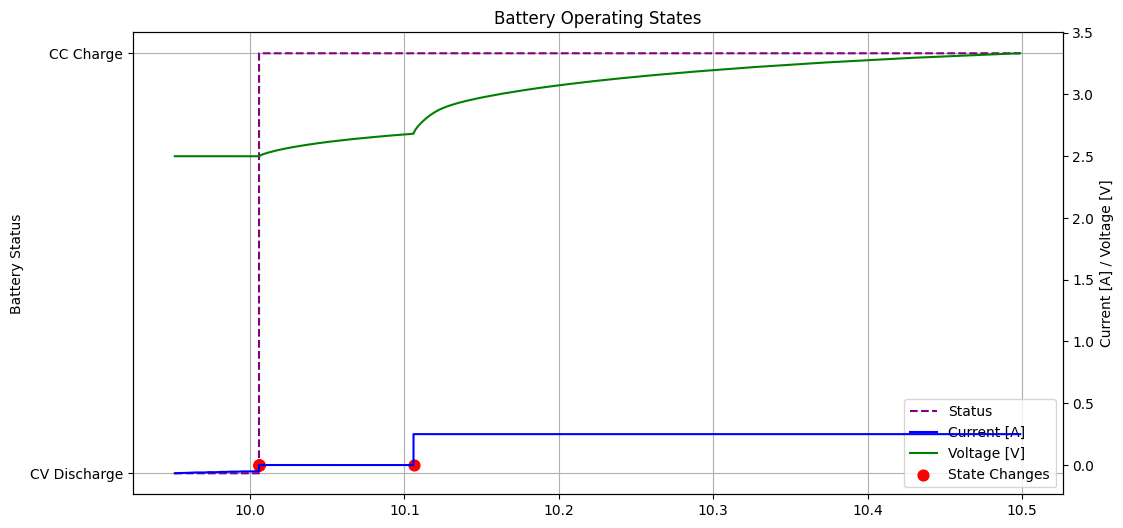

In [7]:
# Other range analysis
plot_battery_data(data, start=9.95, end=10.5)